<a href="https://colab.research.google.com/github/ishitabose/ML_MINI_PROJECT/blob/main/ML_MINI_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

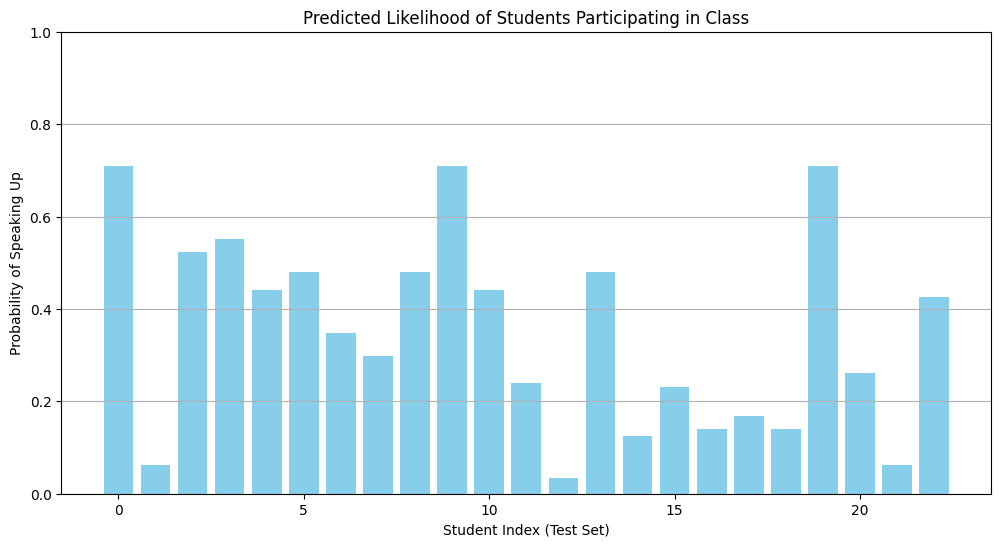

In [ ]:
# --- Imports ---
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np

# --- Load dataset ---
df = pd.read_csv("/content/Data Collection for ML mini project (Responses) - Form Responses 1.csv")

# --- Clean column names by stripping whitespace ---
df.columns = df.columns.str.strip()

# --- Select required columns ---
features = ["Reads Books", "Risk taking", "Club top1"]
target = "Introversion extraversion"
df = df[features + [target]].copy()

# --- Clean data ---
df = df.dropna()

# Convert target to numeric and handle non-numeric values
df[target] = pd.to_numeric(df[target], errors='coerce')
df = df.dropna(subset=[target])  # Drop rows where target is NaN after coercion

# Encode categorical features
le_reads = LabelEncoder()
df["Reads Books"] = le_reads.fit_transform(df["Reads Books"])

le_club = LabelEncoder()
df["Club top1"] = le_club.fit_transform(df["Club top1"])

# Convert target into binary: 1 = likely to participate (>=4), 0 = less likely (<=3)
df["participates"] = (df[target] >= 4).astype(int)

# Features and target
X = df[features]
y = df["participates"]

# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Train model ---
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# --- Predict likelihood (probability of participation = class 1) ---
y_probs = model.predict_proba(X_test)[:, 1]

# --- Plot probability bar graph ---
plt.figure(figsize=(12,6))
plt.bar(range(len(y_probs)), y_probs, color='skyblue')
plt.title("Predicted Likelihood of Students Participating in Class")
plt.xlabel("Student Index (Test Set)")
plt.ylabel("Probability of Speaking Up")
plt.ylim(0, 1)
plt.grid(axis='y')  # Only horizontal grid lines
plt.show()
